## **Earth model assumption: ground truth generation**
### (1) Creating a shear wave velocity profile
### (2) Computing the particle displacement of vertucal component



C:\Users\KinhTran\.conda\envs\kinhgign\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


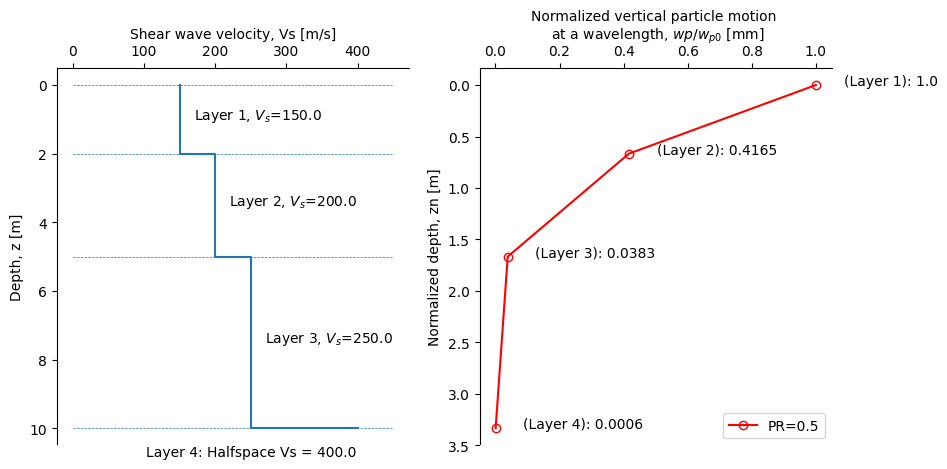

In [88]:
# Earth proflie
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
LayerData = np.array([[150,0],
                      [200,2],
                      [250,5],
                      [400,10],
                      [400,np.inf]])
z = LayerData[:,1]
num_layer = len(z)-1
Vs = LayerData[:,0]
Layer_Vs = Vs[0:-1]
fig,ax = plt.subplots(1,2,figsize=(10,5),dpi=100)
ax[0].step(LayerData[:,0],LayerData[:,1])
ax[0].invert_yaxis()
xlimit = [0,LayerData[-1,0]+50]
for i in range(len(LayerData[:,0])-1):
    ax[0].hlines(y=LayerData[i,1],xmin=xlimit[0],xmax=xlimit[1],linestyle='--',linewidth=0.5)
ax[0].set_xlabel('Shear wave velocity, Vs [m/s]')
ax[0].set_ylabel('Depth, z [m]')
ax[0].xaxis.set_label_position('top')
ax[0].xaxis.tick_top()
mid_layer = LayerData[:-1,1]+0.5*(LayerData[1:,1]-LayerData[:-1,1])
label = LayerData[:-1,0]
for i in range(num_layer):
    name = ('Layer {}, $V_s$={}').format(i+1,label[i])
    ax[0].annotate(name, (label[i],mid_layer[i]), textcoords='offset points', xytext=(10,0))
halfspace_Vs = ('Layer {}: Halfspace Vs = {}').format(num_layer,LayerData[-1,0])
ax[0].annotate(halfspace_Vs,(LayerData[-3,0],LayerData[-2,1]),textcoords='offset points',horizontalalignment='center', xytext=(0,-20))
ax[0].spines['bottom'].set_color('white')
ax[0].spines['right'].set_color('white')

Lambda = np.zeros((30))
DeltaLambda = 1
for i in range(len(Lambda)):
    Lambda[0] = 2 # m
    if i > 0:
        Lambda[i] = Lambda[i-1] + DeltaLambda
def Partical_displacement(WL):
    SF=1
    cv = np.array([0.2507, -0.4341, -0.8474*2*np.pi, -0.3933*2*np.pi])
    cv1 = cv[0] 
    cv2 = cv[1] 
    cv3 = cv[2] 
    cv4 = cv[3]
    # Normalization
    zn = z/WL
    # compute amplitude of particle displacements
    pmv = (cv1*np.exp(cv3*zn) + cv2*np.exp(cv4*zn))*SF
    pmv_norm = pmv/pmv[0]
    # plotting
    ax[1].plot(pmv_norm,zn,'-or', markerfacecolor='None')
    ax[1].xaxis.tick_top()
    ax[1].xaxis.set_label_position('top')
    ax[1].set_xlabel('Normalized vertical particle motion \n at a wavelength, $wp/w_{p0}$ [mm]')
    ax[1].set_ylabel('Normalized depth, zn [m]')
    ax[1].vlines(x=0,ymin=zn[0],ymax=zn[-1],linestyles='--',linewidth=1)
    ax[1].legend(['PR=0.5'],loc='lower right')
    ax[1].invert_yaxis()
    for i in range(num_layer):
        label = ('(Layer {}): {}').format(i+1,np.round(pmv_norm[i],4))
        ax[1].annotate(label, (pmv_norm[i],zn[i]), textcoords='offset points', xytext=(20,0))
    ax[1].spines['bottom'].set_color('white')
    ax[1].spines['right'].set_color('white')
    return pmv
pmv = Partical_displacement(Lambda[1])

## Computing normaized weighting factor
### Compute with each value of supposed wavelength 

In [89]:
def Compute_Weights(WL):
    Ai = np.zeros((num_layer,1),dtype='object')
    wp = np.zeros((num_layer,1),dtype='float')
    SF = 1
    low_bound = z[:-1]
    up_bound = z[1:]
    h = sp.symbols('h')
    cv = np.array([0.2507, -0.4341, -0.8474*2*np.pi, -0.3933*2*np.pi])
    cv1 = cv[0] 
    cv2 = cv[1] 
    cv3 = cv[2] 
    cv4 = cv[3]
    pmv_norm = (cv1*sp.exp(cv3/WL*h) + cv2*sp.exp(cv4/WL*h))*SF 
    for j in range(num_layer):
        Ai[j,0] = sp.integrate(pmv_norm,(h,low_bound[j],up_bound[j]))
        A = sp.integrate(pmv_norm,(h,low_bound[0],up_bound[-1])) 
        wp[j,0] = Ai[j] / A
    return wp
wp = np.zeros((len(Lambda)),dtype='object')
for i in range(len(wp)):
    wp[i] = np.zeros((num_layer))
    wp[i] = Compute_Weights(Lambda[i])
    print(('WAVELENGTH {} PASSED').format(i+1))
    ERROR = 1E-6
    if (np.sum(wp[i]) - 1 > ERROR):
        print('NOT PASSED')
    else: continue

WAVELENGTH 1 PASSED
WAVELENGTH 2 PASSED
WAVELENGTH 3 PASSED
WAVELENGTH 4 PASSED
WAVELENGTH 5 PASSED
WAVELENGTH 6 PASSED
WAVELENGTH 7 PASSED
WAVELENGTH 8 PASSED
WAVELENGTH 9 PASSED
WAVELENGTH 10 PASSED
WAVELENGTH 11 PASSED
WAVELENGTH 12 PASSED
WAVELENGTH 13 PASSED
WAVELENGTH 14 PASSED
WAVELENGTH 15 PASSED
WAVELENGTH 16 PASSED
WAVELENGTH 17 PASSED
WAVELENGTH 18 PASSED
WAVELENGTH 19 PASSED
WAVELENGTH 20 PASSED
WAVELENGTH 21 PASSED
WAVELENGTH 22 PASSED
WAVELENGTH 23 PASSED
WAVELENGTH 24 PASSED
WAVELENGTH 25 PASSED
WAVELENGTH 26 PASSED
WAVELENGTH 27 PASSED
WAVELENGTH 28 PASSED
WAVELENGTH 29 PASSED
WAVELENGTH 30 PASSED


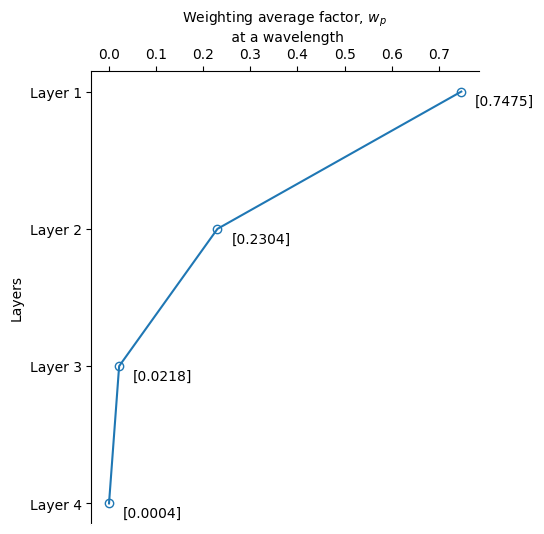

In [90]:
# Distribution of weighting
test_wp = wp[1]
labels = ['Layer 1','Layer 2','Layer 3','Layer 4']
fig,ax=plt.subplots(figsize=(5,6),dpi=100)
plt.plot(test_wp,labels,'-o',markerfacecolor='None')
plt.xlabel('Weighting average factor, $w_{p}$ \n at a wavelength')
plt.ylabel('Layers')
ax.invert_yaxis()
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
for i in range(num_layer):
        label = ('{}').format(np.round(test_wp[i],4))
        ax.annotate(label, (test_wp[i],labels[i]), textcoords='offset points', xytext=(10,-10))
ax.spines['bottom'].set_color('white')
ax.spines['right'].set_color('white')

Text(0, 0.5, 'Wavelength, [m]')

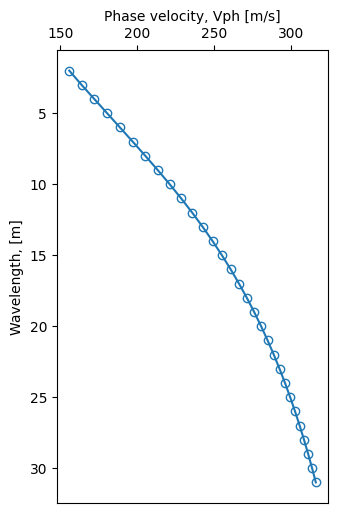

In [91]:
# Compute phase velocity
def Phase_velocity(Layer_Vs,wp):
    Vph = np.dot(Layer_Vs,wp)
    return Vph
Vph = np.zeros((len(Lambda)))
for i in range(len(Lambda)):
    Vph[i] = Phase_velocity(Layer_Vs,wp[i])
fig,ax=plt.subplots(figsize=(3.5,6),dpi=100)
ax.plot(Vph,Lambda,'-o',markerfacecolor='None')
ax.invert_yaxis()
ax.set_xlabel('Phase velocity, Vph [m/s]')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_ylabel('Wavelength, [m]')

In [92]:
print(Vph)

[155.82455584 163.7890475  172.09016796 180.38815248 188.69160128
 196.9779656  205.17630113 213.20234404 220.98199451 228.46022861
 235.60168816 242.38777481 248.81283384 254.88056926 260.60108295
 265.98859047 271.05973326 275.83237074 280.32473985 284.55488711
 288.54029852 292.29767062 295.84278072 299.19042564 302.35440698
 305.34754723 308.18172534 310.86792432 313.41628516 315.8361635 ]
